In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
from sklearn.metrics import silhouette_score

In [122]:
data = pd.read_csv ('experiments.csv')
print(data)

    index         x         y
0       0  1.689478  4.374367
1       1 -3.082399  3.479117
2       2  4.910923 -1.135805
3       3 -5.445507 -3.273572
4       4  1.095043  2.843270
..    ...       ...       ...
75     75 -2.927031 -2.181505
76     76  2.852553  3.027660
77     77 -2.964642  2.967295
78     78  4.545025 -1.798611
79     79 -4.909784 -2.718275

[80 rows x 3 columns]


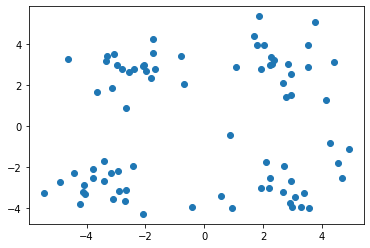

In [123]:
plt.scatter(df['x'],df['y'])

In [147]:
class KMeans:
    def __init__(self, num_clusters=4, max_iter=500):
        self.num_clusters = num_clusters
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.num_clusters):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.num_clusters):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [148]:
X = np.array([[x,y] for x, y in zip(data['x'], data['y'])])

In [149]:
X.shape

(80, 2)

How many clusters should we use? For the k-means clustering method, the most common approach for answering this question is the so-called **elbow method**.

In [151]:
#Finding the optimal K using the elbow method
Sum_of_squared_distances = []
silhoute = []
K = range(1,10)
for k in K:
    km = KMeans(num_clusters=k)
    km.fit(X)
    if k != 1:
        answers = []
        for i in range(len(X)):
            predict_me = np.array(X[i].astype(float))
            predict_me = predict_me.reshape(-1, len(predict_me))
            prediction = km.predict(predict_me)
            answers.append(prediction)
        answers = np.array(answers)
        silhoute.append(silhouette_score(X, answers))
silhoute.insert(0,0)

In [152]:
def draw_picture(clusters):
  colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
  vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
  plt.figure(figsize=(10,10))
  plt.scatter(data.iloc[:,1], data.iloc[:,2], c=vectorizer(clusters),s=10)

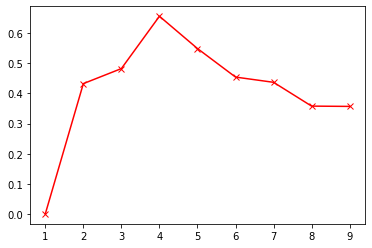

In [154]:
plt.plot(K, silhoute, 'rx-')

In [158]:
data = pd.read_csv('experiments.csv')
X = np.array([[x,y] for x, y in zip(data['x'], data['y'])])

kmeans = KMeans()
kmeans.fit(X)

answers = []
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    answers.append(prediction)

answers = np.array(answers)
# pd.DataFrame(answers).to_csv("answers.csv", header=None, index=None)

In [159]:
answers

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

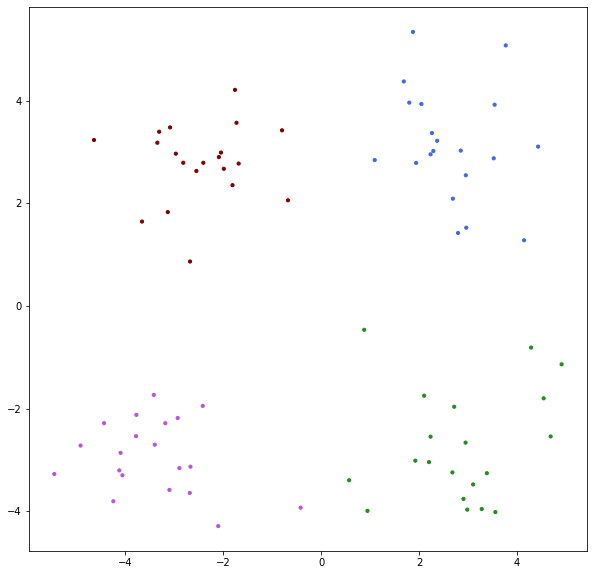

In [160]:
draw_picture(answers)